This notebook is about the Gambler's Problem, as described in Sutton's Reinforcement Learning book, 2nd edition, page 68.

Here is a summary of the problem:
A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many dollars as he has staked on that flip; if it is tails, he loses his stake.
The game ends when the gambler wins by reaching his goal of $100, or loses by running out of money. On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars.
The gambler does not know in advance the probability of head vs tail.

We use Value Iteration to this problem, as suggested in the book.

In [1]:
import time

import matplotlib.pyplot as plt

from baserl.common import *
from baserl.gambler import Gambler

In [2]:
%matplotlib inline

delta at iteration: 1 0.9533440000000001
delta at iteration: 2 0.3688960000000001
delta at iteration: 3 0.13926400000000005
delta at iteration: 4 0.05570560000000002
delta at iteration: 5 0.02228224000000001
delta at iteration: 6 0.008912896000000003
delta at iteration: 7 0.0016384000000000008
delta at iteration: 8 0.0003932160000000005
delta at iteration: 9 7.602595430399994e-05
delta at iteration: 10 3.041038172160032e-05
delta at iteration: 11 2.6418075402233343e-06
delta at iteration: 12 9.045549017728909e-07
delta at iteration: 13 7.815354352569415e-08
delta at iteration: 14 1.8756850440893036e-08
delta at iteration: 15 5.230363003816407e-09
delta at iteration: 16 1.869841788348925e-09
delta at iteration: 17 7.479367151660976e-10
delta at iteration: 18 1.8698417900836484e-10
delta at iteration: 19 4.8203025772297625e-11
delta at iteration: 20 1.928121030891905e-11
delta at iteration: 21 1.6749952119754496e-12
delta at iteration: 22 5.735177957544302e-13
delta at iteration: 23 4.95

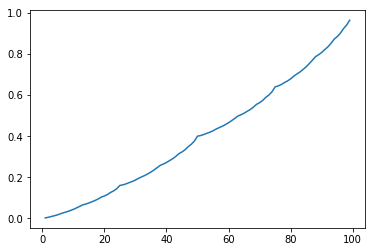


policy:


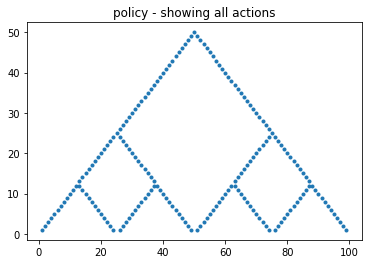

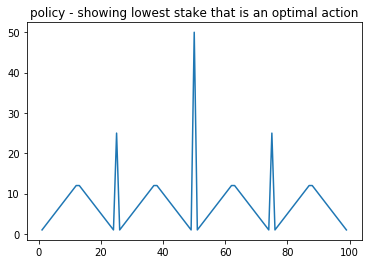


Done in time: 0.408585786819458


In [3]:
# The delta_threshold is set to an extremly low value just so we can reach 32 iterations,
# to reproduce the graphs from the RL book.
# Normally we don't need such a low threshold, since the optimal policy is reached much faster.
mdp = Gambler(goal=100, prob_win=0.4)
start_time = time.time()
v_history = []
mdp_policy, mdp_v = value_iteration(
        states=mdp.states(), 
        is_terminal=mdp.is_terminal, 
        actions=mdp.actions,
        transitions=mdp.transitions,
        gamma=mdp.gamma(),
        delta_threshold=0.0000000000000000001,
        max_iter=35,
        print_value=mdp.print_value,
        print_policy=mdp.print_policy,
        v_history=v_history)
print("Done in time:", time.time()-start_time)

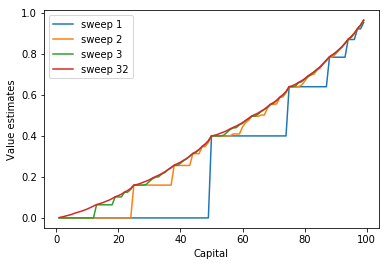

In [4]:
# Reproducing the "Capital vs Value Estimates" graph from page 68 of the RL book
xaxis = list(v_history[0][0].keys())[1:-1]
for i in [0, 1, 2, 31]:
    plt.plot(xaxis, [v_history[i][0][x] for x in xaxis], label=("sweep %d" % (i+1)))
plt.legend()
plt.xlabel("Capital")
plt.ylabel("Value estimates")
plt.show()

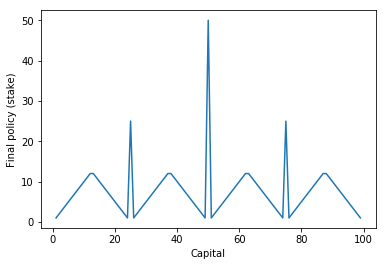

In [5]:
# Reproducing the "Final policy" graph on page 68 of the RL book
xaxis = []
yaxis = []
for x, actions in mdp_policy.items():
    xaxis.append(x)
    max_p = None
    max_a = None
    # Find the lowest optimal amount to bet
    for action, prob in sorted(actions.items(), key=lambda x: x[0], reverse=False):
        if max_p is None or max_p < prob:
            max_p = prob
            max_a = action
    yaxis.append(max_a)
plt.xlabel("Capital")
plt.ylabel("Final policy (stake)")
plt.plot(xaxis, yaxis)

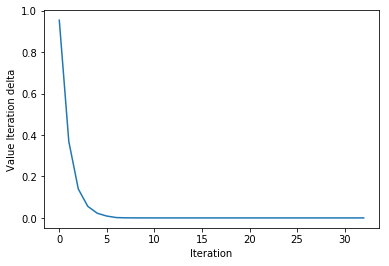

In [7]:
# Showing the delta from the Value Iteration algorithm across successive iterations.
# We see that it converges very fast.
xaxis = range(len(v_history))
plt.plot([v_history[i][1] for i in xaxis])
plt.xlabel("Iteration")
plt.ylabel("Value Iteration delta")
plt.show()